In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [11]:
rnd = np.random.RandomState(42)
data = rnd.normal(0, 0.5, size=9)
data

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493, -0.11707669,
       -0.11706848,  0.78960641,  0.38371736, -0.23473719])

# Tenemos pocos datos
queremos tener una estimacion de la distribucion

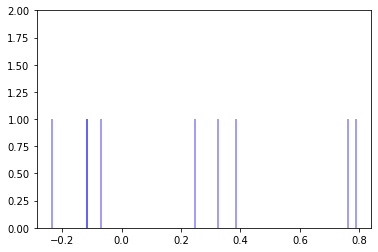

In [12]:
plt.vlines(data, ymin=0, ymax=1, color='b', alpha=0.5)
plt.ylim(0, 2);

# Estimacion paramétrica

Estimamos los parametros $\mu$ y $\sigma$ de la distribución normal.
Por supuesto, estamos asumiendo que los datos provienen de una distribución Normal. Que pasa si no sabemos de que distribución vienen?

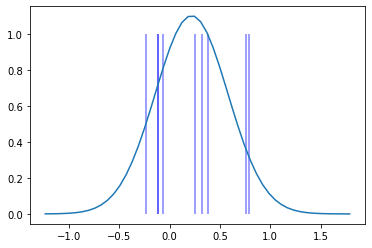

In [13]:
mu = np.mean(data)
sigma = np.std(data)
x = np.linspace(data.min()-1, data.max()+1)
distr = norm(mu, sigma)

plt.vlines(data, ymin=0, ymax=1, color='b', alpha=0.5)
plt.plot(x, distr.pdf(x));

Qué pasa si los datos no provienen de una distribución normal?

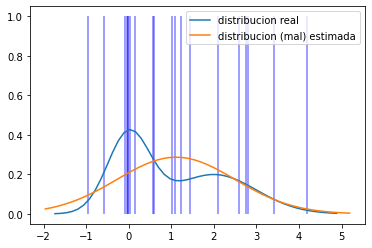

In [19]:
# Datos de una distribución multimodal en 0 y en 2
data = np.hstack([
  rnd.normal(0, 0.5, size=10), 
  rnd.normal(2, 1, size=10)
])

plt.vlines(data, ymin=0, ymax=1, color='b', alpha=0.5)
plt.plot(x, (norm(0, 0.5).pdf(x) + norm(2, 1).pdf(x))/2, 
         label='distribucion real');
mu = np.mean(data)
sigma = np.std(data)
x = np.linspace(data.min()-1, data.max()+1)
distr = norm(mu, sigma)

plt.plot(x, distr.pdf(x), label='distribucion (mal) estimada');
plt.legend()

# Un histograma nos dice algo

Pero no alganza para representar una distribucion, es muy "pixelado"

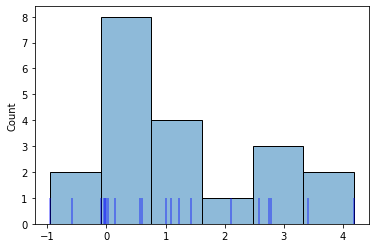

In [20]:
sns.histplot(data, alpha=0.5)
plt.vlines(data, ymin=0, ymax=1, color='b', alpha=0.5);

# Podemos poner una distribucion normal centrada en cada datapoint

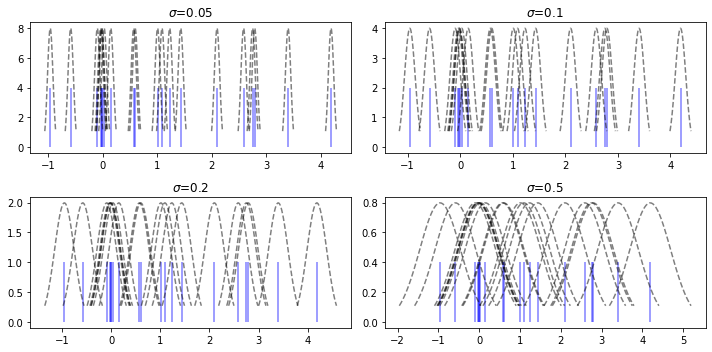

In [21]:
plt.figure(figsize=(10,5))
stds = [0.05, 0.1, 0.2, 0.5]

for i in range(4):
  plt.subplot(2,2,i+1)
  std = stds[i]
  ymax = 0
  for e in data:
    x = np.linspace(e - 2*std, e + 2*std)
    distr = norm(e, std)
    y = distr.pdf(x)
    ymax = max(y.max(), ymax)
    plt.plot(x, y, 'k--', alpha=0.5)
  plt.vlines(data, ymin=0, ymax=ymax / 2, color='b', alpha=0.5)
  plt.title(f'$\sigma$={std}')
plt.tight_layout()

# Y luego sumar esas distribuciones

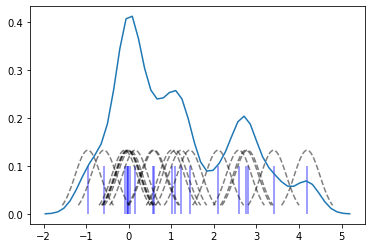

In [25]:
plt.vlines(data, ymin=0, ymax=0.1, color='b', alpha=0.5)
std = 0.3 # juga con esto

for e in data:
  x = np.linspace(e - 2*std, e + 2*std)
  distr = norm(e, std)
  plt.plot(x, distr.pdf(x)/10, 'k--', alpha=0.5)

x = np.linspace(data.min() - 1, data.max() + 1)
kde = lambda x: np.mean([norm(e, std).pdf(x) for e in data], axis=0)
plt.plot(x, kde(x));

# Obviamente ya viene en seaborn implementado

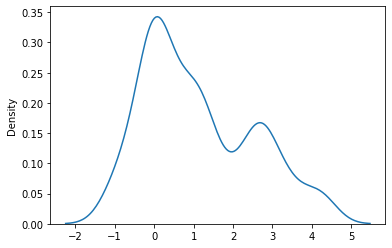

In [26]:
sns.kdeplot(data, bw_method=0.3);